# **Polynomial Regression**
All imports


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading CSV

In [5]:
df = pd.read_csv("salary.csv")
df = df.drop(columns = "Position")
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


Extract x and y

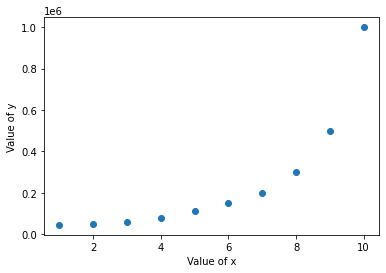

X:     Level  Level0  Level1  Level2  Level3  Level4
0      1       1       1       1       1       1
1      2       1       2       4       8      16
2      3       1       3       9      27      81
3      4       1       4      16      64     256
4      5       1       5      25     125     625
5      6       1       6      36     216    1296
6      7       1       7      49     343    2401
7      8       1       8      64     512    4096
8      9       1       9      81     729    6561
9     10       1      10     100    1000   10000
Y:	Salary
 0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


In [6]:
y = df['Salary']
x = df.drop(columns = "Salary")

# creating polynomial power till order 4
order = 5
for i in range(order):
    x['Level' + str(i)] = x["Level"] ** i

plt.scatter(x['Level'], y)
plt.xlabel("Value of x")
plt.ylabel("Value of y")
plt.show()
print("X: ", x)
print("Y:\tSalary\n", y)

# taking only values
x = x.iloc[:, :].values
y = y.values

Cost function

In [7]:
def costCalculation(x, y, w, b):
    cost = np.sum((y - x.dot(w) - b) ** 2)
    return 2 * cost / len(y)

Gradiant Descent

In [9]:
def lossCalculation(x, y, w, b):
    loss = y - x.dot(w) - b
    return loss

def gradiantDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
    for epoch in range(epochs):
        n = len(y)
        w_grad = (-1 / n) * x.T.dot(lossCalculation(x, y, w, b))
        b_grad = (-1 / n) * np.sum(lossCalculation(x, y, w, b))

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        # print(w_grad)

        cost = costCalculation(x, y, w, b)
        cost_list[epoch] = cost
        if epoch % 500 == 0:
            print(f"Epoch: {epoch} --> Cost: {cost}")
        
    return w, b, cost_list
w, b, learning_rate, epochs = np.zeros(x.shape[1]), 0, 0.00000001, 10000
w, b, cost_list = gradiantDescent(x, y, w, b, learning_rate, epochs)
print("W: ", w, "B: ", b)

Epoch: 0 --> Cost: 199374414509.05234
Epoch: 500 --> Cost: 7489149442.630809
Epoch: 1000 --> Cost: 7479176581.2203245
Epoch: 1500 --> Cost: 7469495031.473448
Epoch: 2000 --> Cost: 7460095846.091629
Epoch: 2500 --> Cost: 7450970352.620005
Epoch: 3000 --> Cost: 7442110145.004758
Epoch: 3500 --> Cost: 7433507075.4097805
Epoch: 4000 --> Cost: 7425153246.284716
Epoch: 4500 --> Cost: 7417041002.676683
Epoch: 5000 --> Cost: 7409162924.778112
Epoch: 5500 --> Cost: 7401511820.70358
Epoch: 6000 --> Cost: 7394080719.488428
Epoch: 6500 --> Cost: 7386862864.3025465
Epoch: 7000 --> Cost: 7379851705.872546
Epoch: 7500 --> Cost: 7373040896.106024
Epoch: 8000 --> Cost: 7366424281.911665
Epoch: 8500 --> Cost: 7359995899.209193
Epoch: 9000 --> Cost: 7353749967.123314
Epoch: 9500 --> Cost: 7347680882.355995
W:  [  3.27367301   1.95540402   3.27367301  -2.13646289 -52.17286149
  96.72760328] B:  1.9554040207946821


Ploting cost list

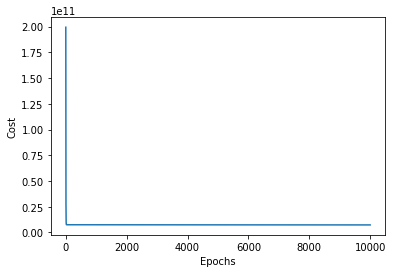

In [10]:
plt.plot(cost_list)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

Predic values

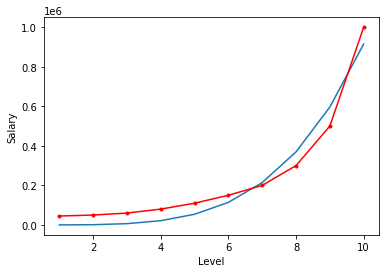

In [11]:
def prediction(x, w, b):
    return x.dot(w) + b

y_predicted = prediction(x, w, b)
# predicted graph
plt.plot(df['Level'].values, y_predicted)
# actual y graph
plt.plot(df["Level"].values, y, color = 'red', marker = '.')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Random inputs test

In [24]:
x_rand = int(input("Enter position represented by number: "))

Enter position represented by number: 7


In [27]:
def random_output(x, w, b):
    y_pred = b
    for i in range(order):
        y_pred = w[i + 1] * x ** i
    return y_pred
print("Prediction: ", random_output(x_rand, w, b))
if not 0 <= x_rand <= 10:
    print("There is not actual value for the input in given given dataset.")
else:
    print("Actual value: ", y[x_rand - 1])

Prediction:  232242.9754770606
Actual value:  200000
